# 作業
### 用 digits (dataset.load_digits()) 資料嘗試跑 t-SNE

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import offsetbox
from sklearn import manifold, datasets

%matplotlib inline


In [2]:
# load dataset
digits = datasets.load_digits(n_class = 10)
X = digits.data
y = digits.target


In [3]:
# select model, set parameters
n_samples, n_features = X.shape
n_neighbors = 30
tsne = manifold.TSNE(n_components=2, # deduct dimentions to 2
                     perplexity = 35,
                     early_exaggeration = 25,
                     learning_rate=150.,
                     random_state=0, 
                     init='pca'
                    )


Computing t-SNE embedding
X:
[[0.43161356 0.9300214 ]
 [0.637038   0.39515063]
 [0.566796   0.3167416 ]
 ...
 [0.47027007 0.343263  ]
 [0.24504337 0.6855746 ]
 [0.47760525 0.3262915 ]]


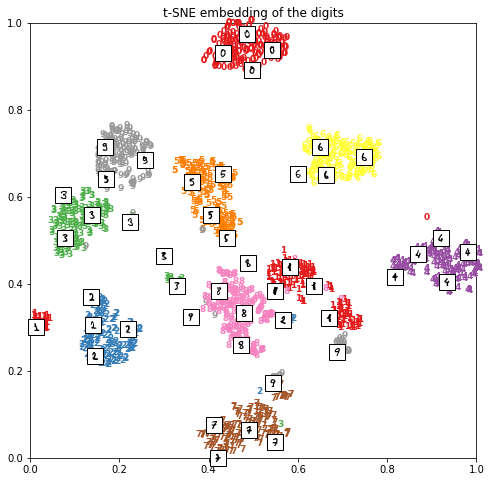

In [4]:
# fit dataset, visualize the data

# Scale and visualize the embedding vectors
def plot_embedding(X, title=None):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)
    print(f"X:\n{X}")

    plt.figure(1, figsize=(8, 8))
    ax = plt.subplot(111)
    for i in range(X.shape[0]):
        plt.text(X[i, 0], X[i, 1], str(y[i]),
                 color=plt.cm.Set1(y[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 9})

    if hasattr(offsetbox, 'AnnotationBbox'):
        # only print thumbnails with matplotlib > 1.0
        shown_images = np.array([[1., 1.]])  # just something big
        #print(f"shown_images:\n{shown_images}")
        
        for i in range(X.shape[0]):
            dist = np.sum((X[i] - shown_images) ** 2, 1)
            if np.min(dist) < 4e-3:
                # don't show points that are too close
                continue
            shown_images = np.r_[shown_images, [X[i]]]
            imagebox = offsetbox.AnnotationBbox(
                offsetbox.OffsetImage(digits.images[i], cmap=plt.cm.gray_r),
                X[i])
            ax.add_artist(imagebox)
        
        #print(f"dist:\n{dist}")
        #print(f"shown_inages:\n{shown_images}")

    # plt.xticks([]), plt.yticks([])
    if title is not None:
        plt.title(title)

# t-SNE embedding of the digits dataset
print("Computing t-SNE embedding")

X_tsne = tsne.fit_transform(X)

plot_embedding(X_tsne,
               "t-SNE embedding of the digits")

plt.show()
